# OLX Car Sales Price Prediction using Decision Trees and Random Forests

This notebook presents a comprehensive machine learning approach to predict used car prices using a dataset of OLX car sales. The analysis covers the following stages:

**Dataset:** The analysis utilizes a cleaned dataset of OLX car sales, containing various features such as location, manufacturing year, kilometers driven, fuel type, transmission, owner type, mileage, engine size, power, and number of seats, along with the target variable, car price.

**Techniques and Algorithms:**
*   **Exploratory Data Analysis (EDA):** Initial data inspection, including checking data types, identifying numerical and categorical features, and analyzing the distribution of categorical variables. A new feature 'Age' was created from the manufacturing year.
*   **Data Preprocessing:** Numerical features were standardized using `StandardScaler`, and categorical features were converted into numerical representations using one-hot encoding (`pd.get_dummies`). The dataset was split into training and testing sets using `train_test_split`.
*   **Model Training:** Several regression algorithms were implemented and trained on the preprocessed data:
    *   **Linear Regression:** A basic linear model was trained, and a log transformation was applied to the target variable ('Price') due to its skewed distribution.
    *   **Decision Tree Regressor:** A decision tree model was trained. Cross-validation was used to check for overfitting, and the `max_depth` was tuned to mitigate it.
    *   **Random Forest Regressor:** An ensemble method using multiple decision trees was trained with 1000 estimators.
    *   **Gradient Boosting Regressor:** Another powerful ensemble method was trained with 1000 estimators.

**Conclusions:**
*   The models were evaluated using R-squared and Root Mean Squared Error (RMSE).
*   The Decision Tree model showed signs of overfitting, which was addressed by limiting the maximum depth.
*   The Random Forest and Gradient Boosting models generally outperformed the Linear Regression and Decision Tree models in terms of RMSE, indicating better prediction accuracy on the test set.
*   Feature importance analysis from the tree-based models revealed that 'Power' and 'Age' were the most significant predictors of car price.

This notebook provides a step-by-step guide to building and evaluating machine learning models for car price prediction, highlighting the importance of data preprocessing, model selection, and understanding feature influence.

#### **Loading Libraries and Dataset**

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting for matplotlib.
%matplotlib inline

In [2]:
# Load the cleaned dataset into a pandas DataFrame.
cardf=pd.read_csv("OLX Car Sales Cleaned.csv")

In [3]:
# Display the first 3 rows of the DataFrame to get a glimpse of the data structure and content.
display(cardf.head(3))

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000


In [4]:
# Display information about the DataFrame, including column data types and non-null counts.
display(cardf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   int64  
 11  Price              6019 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 564.4+ KB


None

#### **Exploratory Data Analytics**

In [5]:
# Separate numerical and object (categorical) columns for further processing.
numcols=cardf.select_dtypes(include=np.number)
objcols=cardf.select_dtypes(include=['object'])

In [6]:
# Create a new feature 'Age' by subtracting the car's manufacturing year from the current year (2023).
numcols['Age']=2023-numcols.Year

In [7]:
# Drop unnecessary columns ('Unnamed: 0', 'Year', and 'Price') from the numerical DataFrame.
numcols=numcols.drop(['Unnamed: 0', 'Year','Price'],axis=1)

In [8]:
# Iterate through object columns and display the frequency distribution of unique values in each.
for col in objcols.columns:
    freq=objcols[col].value_counts()
    display(freq)

,count
Location,
Mumbai,790
Hyderabad,742
Kochi,651
Coimbatore,636
Pune,622
Delhi,554
Kolkata,535
Chennai,494
Jaipur,413


,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


,count
Transmission,
Manual,4299
Automatic,1720


,count
Owner_Type,
First,4929
Second,968
Third,113
Fourth & Above,9


In [9]:
# Display descriptive statistics for the numerical columns, providing insights into their distribution.
display(numcols.describe())

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,18.134966,1620.509221,112.883539,5.276790,9.641801
std,9.126884e+04,4.581528,599.635458,53.283701,0.806346,3.269742
min,1.710000e+02,0.000000,72.000000,34.200000,0.000000,4.000000
25%,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,7.000000
50%,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,9.000000
75%,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,12.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,25.000000


#### **Data Preprocessing**

In [10]:
# Import StandardScaler for standardizing numerical features.
from sklearn.preprocessing import StandardScaler

In [11]:
# Standardize the numerical features to have zero mean and unit variance.
numcols_scaled=StandardScaler().fit_transform(numcols)

In [12]:
# Convert the scaled numerical features back to a pandas DataFrame with original column names.
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [13]:
# Display the first 2 rows of the scaled numerical DataFrame.
display(numcols_scaled.head(2))

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age
0,0.145315,1.847798,-1.038232,-1.027107,-0.343293,1.027139
1,-0.194369,0.335076,-0.064226,0.249937,-0.343293,-0.502161


In [14]:
# Perform one-hot encoding on the object (categorical) columns to convert them into numerical representations.
objcols_dummy=pd.get_dummies(objcols)

In [15]:
# Display the first 2 rows of the one-hot encoded categorical DataFrame.
display(objcols_dummy.head(2))

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False


In [16]:
# Concatenate the scaled numerical features and one-hot encoded categorical features to create the final feature set.
cardf_final=pd.concat([numcols_scaled,objcols_dummy],axis=1)

In [17]:
# Define the target variable 'y' as the 'Price' column and the feature set 'X' as the final concatenated DataFrame.
y=cardf.Price
X=cardf_final

In [18]:
# Import train_test_split for splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split

In [19]:
# Split the data into training and testing sets with a test size of 20% and a fixed random state for reproducibility.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#### **Model Training for Logistic Regression**

In [20]:
# Import LinearRegression model.
from sklearn.linear_model import LinearRegression

In [21]:
# Initialize and train a Linear Regression model on the training data.
# Use np.log() for the dependent variable 'y_train' as 'Price' is positively skewed.
regmodel=LinearRegression().fit(X_train,np.log(y_train))

In [22]:
# Evaluate the Linear Regression model on the training data using the R-squared score.
display(regmodel.score(X_train,np.log(y_train)))

0.882861838963127

In [23]:
# Make predictions on the test set using the trained Linear Regression model.
regmodel_test_pred=regmodel.predict(X_test)

In [24]:
# Exponentiate the predicted values to revert the log transformation and get the prices in their original scale.
regmodel_test_pred=np.exp(regmodel_test_pred)

In [25]:
# Import root_mean_squared_error for evaluating the model performance.
from sklearn.metrics import root_mean_squared_error

In [26]:
# Calculate the Root Mean Squared Error (RMSE) of the Linear Regression model on the test set.
display(root_mean_squared_error(y_test,regmodel_test_pred))

616932.6583098057

In [27]:
# Display the coefficients of the Linear Regression model along with their corresponding feature names.
display(pd.DataFrame(X.columns,regmodel.coef_))

,0
-0.108907,Kilometers_Driven
-0.087714,Mileage
0.091621,Engine
0.376455,Power
0.001708,Seats
-0.393710,Age
0.029914,Location_Ahmedabad
0.157150,Location_Bangalore
0.018219,Location_Chennai
0.092733,Location_Coimbatore


#### **Model Training for Decision Tree Regressor**

In [28]:
# Import DecisionTreeRegressor model.
from sklearn.tree import DecisionTreeRegressor

In [29]:
# Initialize and train a Decision Tree Regressor model on the training data.
treemodel=DecisionTreeRegressor().fit(X_train,y_train)

In [30]:
# Evaluate the Decision Tree Regressor model on the training data using the R-squared score.
display(treemodel.score(X_train,y_train)) # R Square

0.999997026789028

**Checking for Overfitting**

In [31]:
# Import cross_val_score for cross-validation.
from sklearn.model_selection import cross_val_score

In [32]:
# Perform cross-validation (5 folds) on the Decision Tree Regressor model to assess its performance and check for overfitting.
cross_val_accuracy = cross_val_score(treemodel,X_train,y_train)
display(cross_val_accuracy)
# Overfitting is indicated by a large difference between the training R-squared and the cross-validation R-squared.

array([0.77220669, 0.81253943, 0.759296  , 0.88270429, 0.67984558])

In [33]:
# Calculate the mean of the cross-validation R-squared scores.
display(np.mean(cross_val_accuracy))
# The significant difference between the training R-squared (0.99) and the average cross-validation R-squared (0.7655) suggests overfitting.

np.float64(0.7813183967655284)

In [34]:
# Initialize and train a Decision Tree Regressor model with a reduced max_depth (8) to mitigate overfitting.
treemodel_depth=DecisionTreeRegressor(max_depth=8).fit(X_train,y_train)

In [35]:
# Evaluate the Decision Tree Regressor model with reduced depth on the training data using the R-squared score.
display(treemodel_depth.score(X_train,y_train))

0.9481809682375465

In [36]:
# Perform cross-validation (5 folds) on the Decision Tree Regressor model with reduced depth.
cross_val_accuracy = cross_val_score(treemodel_depth,X_train,y_train)
display(cross_val_accuracy)

array([0.82407043, 0.82304414, 0.78012936, 0.87946313, 0.71875378])

In [37]:
# Calculate the mean of the cross-validation R-squared scores for the model with reduced depth.
display(np.mean(cross_val_accuracy))
# The smaller difference between the training R-squared and the average cross-validation R-squared suggests reduced overfitting compared to the previous model.

np.float64(0.8050921695184027)

In [38]:
# Make predictions on the test set using the Decision Tree Regressor model with reduced depth.
tree_test_predict=treemodel_depth.predict(X_test)

In [39]:
# Calculate the Root Mean Squared Error (RMSE) of the Decision Tree Regressor model with reduced depth on the test set.
display(np.sqrt(np.mean(np.square(y_test-tree_test_predict)))) # RMSE

np.float64(490624.2381571716)

#### **Display the tree structure**

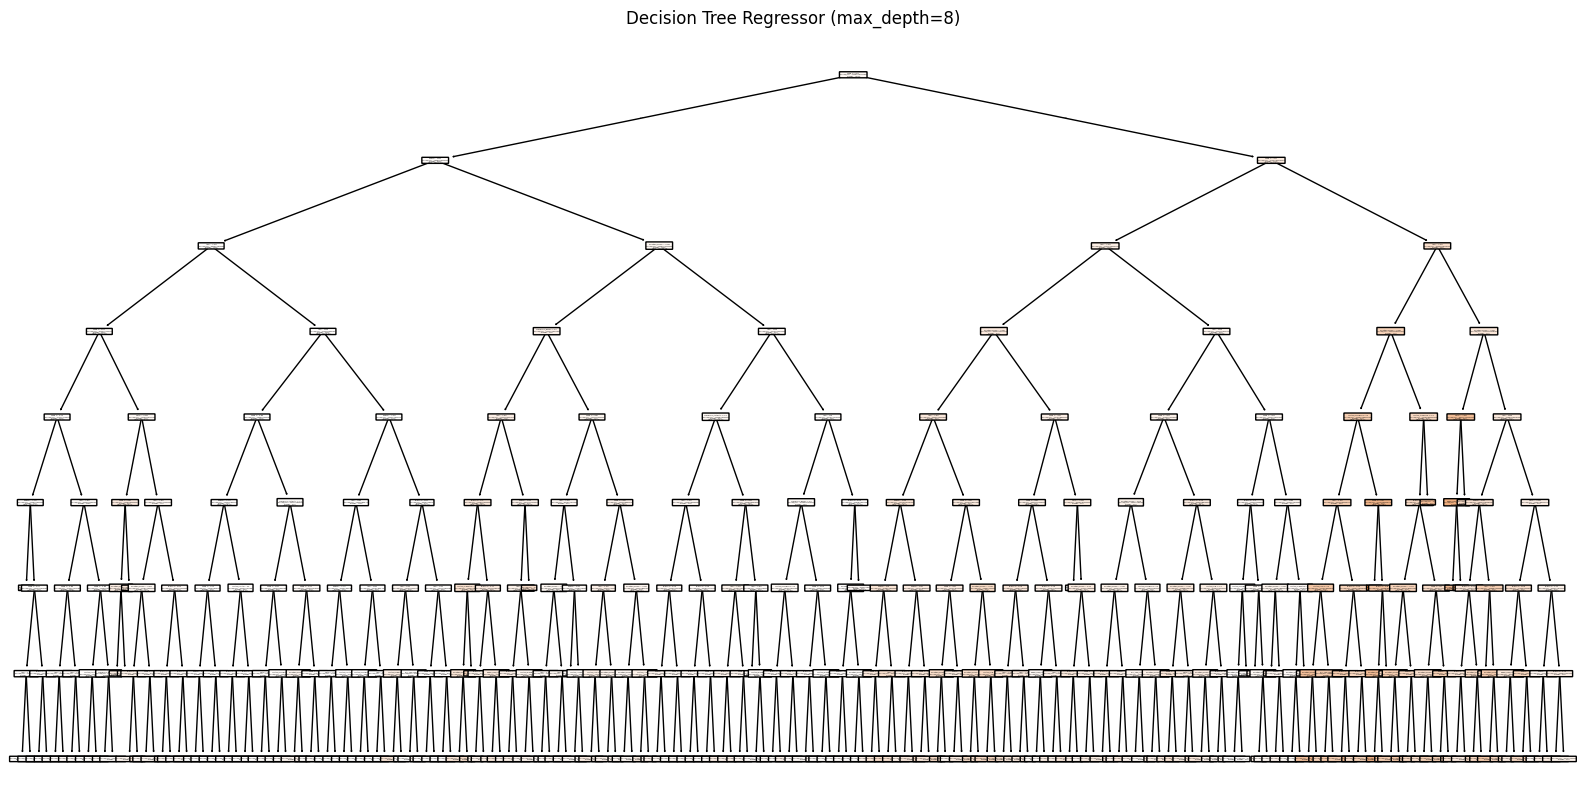

In [40]:
# Import necessary libraries for plotting the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(treemodel_depth, filled=True, feature_names=X.columns, rounded=True, proportion=True, max_depth=8)
plt.title("Decision Tree Regressor (max_depth=8)")
plt.show()

**Feature List in Ascending order of Importance**

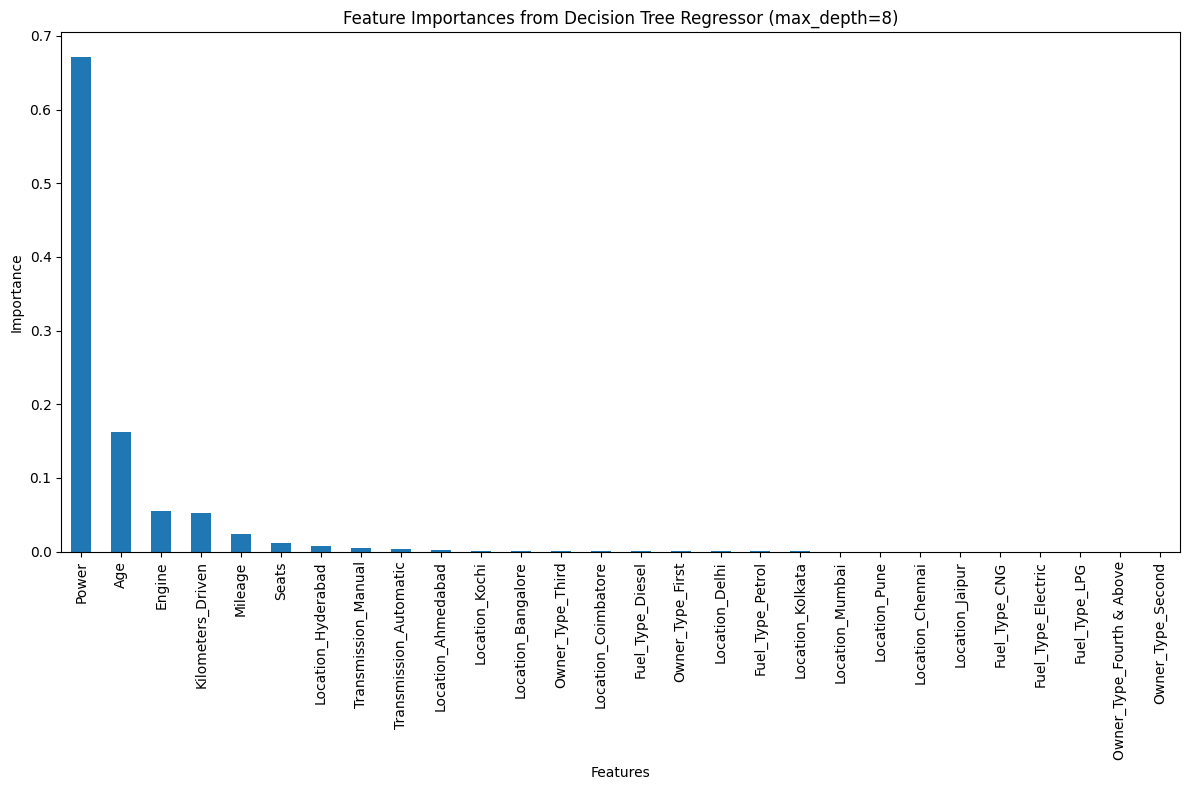

In [41]:
# Get feature importances from the Decision Tree model
feature_importances = treemodel_depth.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the sorted feature importances
# display(sorted_feature_importances)

# Create a bar plot
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='bar')
plt.title("Feature Importances from Decision Tree Regressor (max_depth=8)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **Model Building for Random Forest Regressor**

In [42]:
# Import RandomForestRegressor model.
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Initialize and train a Random Forest Regressor model with 1000 estimators on the training data.
RFmodel=RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)

In [44]:
# Evaluate the Random Forest Regressor model on the training data using the R-squared score.
display(RFmodel.score(X_train,y_train)) # R Square

0.9855302962927337

In [45]:
# Make predictions on the test set using the trained Random Forest Regressor model.
RF_predict=RFmodel.predict(X_test)
display(RF_predict)

array([ 560571.        , 1305560.        ,  788155.        , ...,
        609104.        ,  504620.        ,  218269.33333333])

In [46]:
# Calculate the Root Mean Squared Error (RMSE) of the Random Forest Regressor model on the test set.
display(root_mean_squared_error(y_test,RF_predict)) # RMSE

397577.8172070897

#### **Model Building for Gradient Boosting Regressor**

In [47]:
# Import GradientBoostingRegressor model.
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Initialize and train a Gradient Boosting Regressor model with 1000 estimators on the training data.
gbmmodel=GradientBoostingRegressor(n_estimators=1000).fit(X_train,y_train)

In [49]:
# Evaluate the Gradient Boosting Regressor model on the training data using the R-squared score.
display(gbmmodel.score(X_train,y_train))

0.988503813528776

In [50]:
# Make predictions on the test set using the trained Gradient Boosting Regressor model.
gbm_predict=gbmmodel.predict(X_test)

In [51]:
# Calculate the Root Mean Squared Error (RMSE) of the Gradient Boosting Regressor model on the test set.
display(root_mean_squared_error(y_test,gbm_predict))

386224.9190863803

#### **Data Visualization**

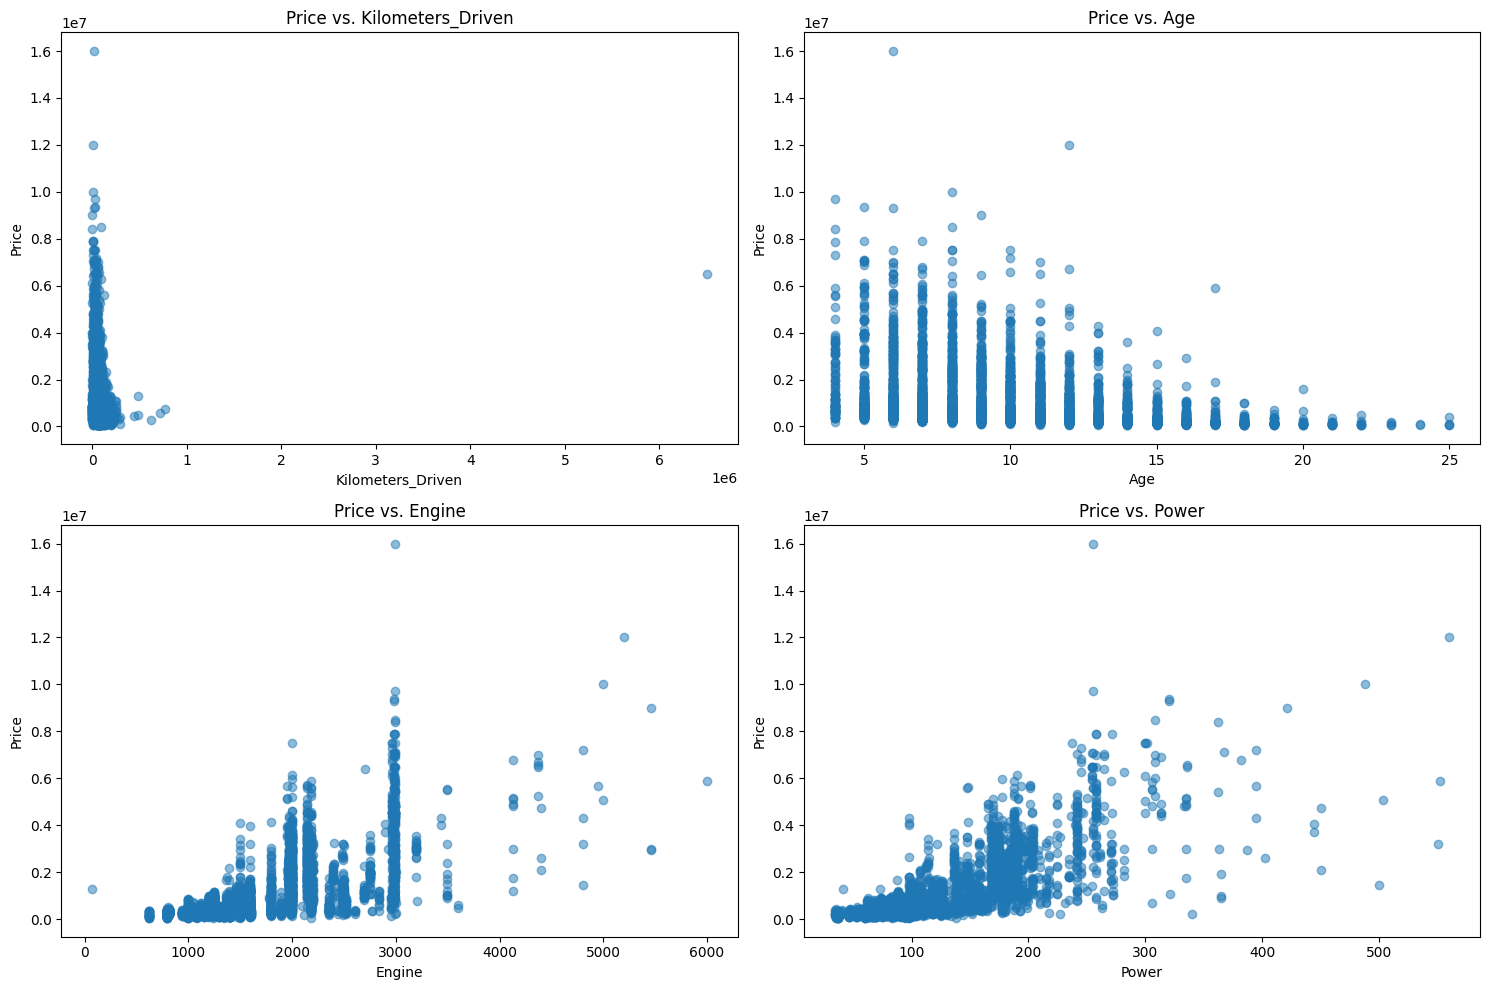

In [54]:
# Scatter plots for numerical features vs. Price
numerical_features = ['Kilometers_Driven', 'Age', 'Engine', 'Power']

# Merge 'Age' column from numcols back to cardf for plotting
cardf_merged = cardf.copy()
cardf_merged['Age'] = numcols['Age']


plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(cardf_merged[feature], cardf_merged['Price'], alpha=0.5)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

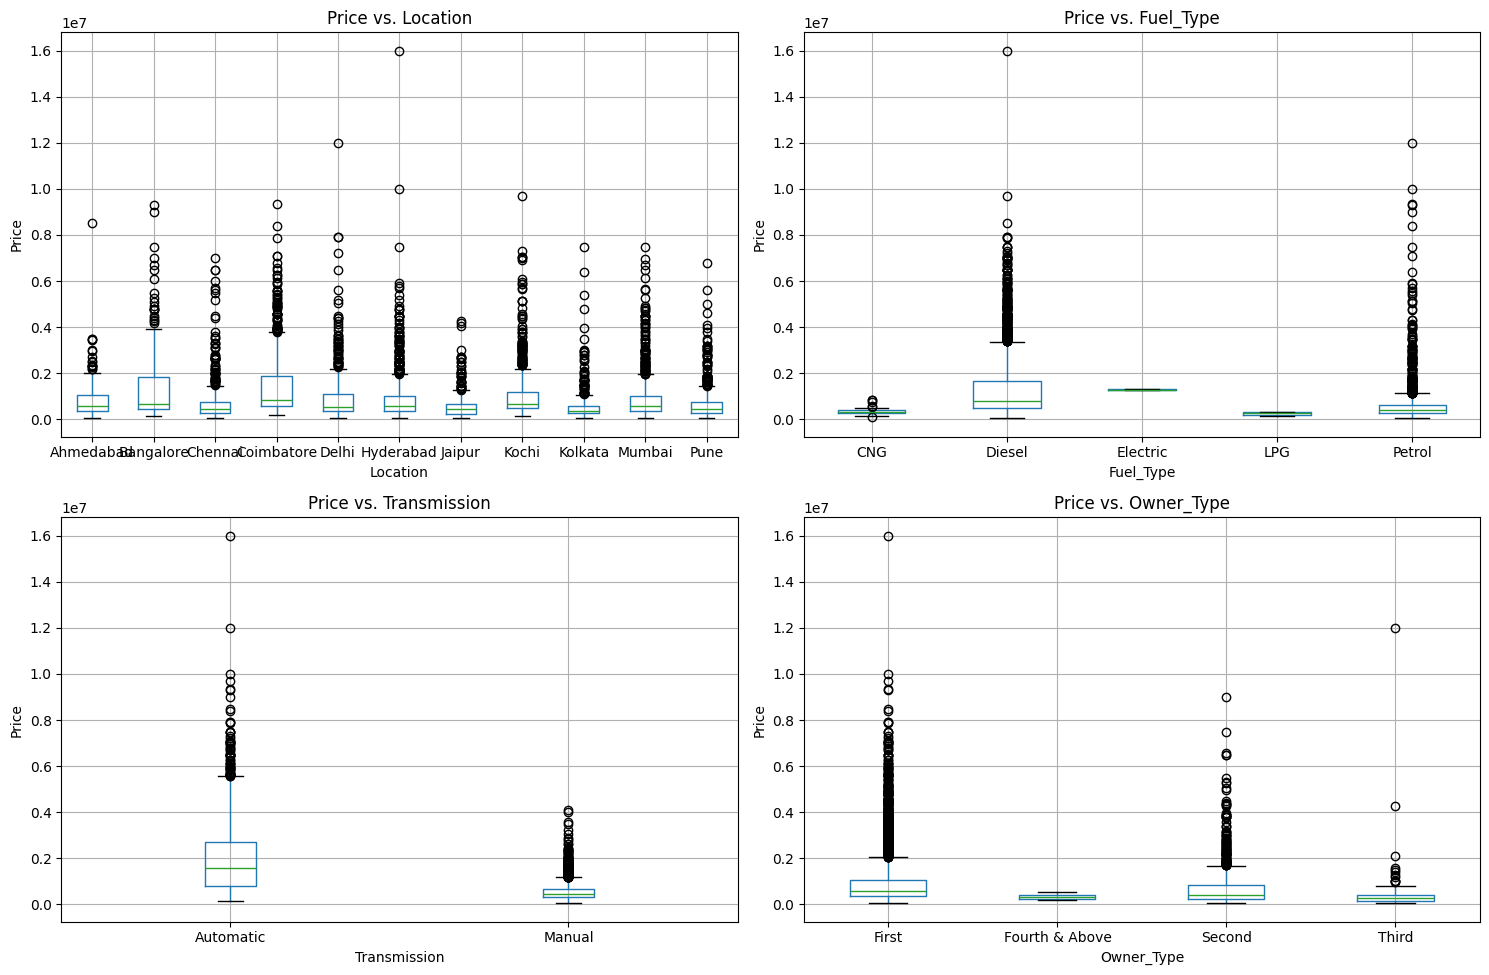

In [53]:
# Box plots for categorical features vs. Price
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    cardf.boxplot(column='Price', by=feature, ax=plt.gca())
    plt.title(f'Price vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.suptitle('') # Suppress the default suptitle
plt.tight_layout()
plt.show()